Del 1 – Teoretiska frågor

1)

Grafen visar att antalet storkar och födelsetalen verkar hänga ihop, men det betyder inte att storkar faktiskt påverkar födelsetalen. Det är en korrelation, men inte kausalitet.

Den riktiga förklaringen handlar om en lurande variabel – nämligen att både storkar och högre födelsetal är vanligare på landsbygden. Där finns fler naturliga häckningsplatser för storkar och samtidigt får människor ofta fler barn än i städer. Det ser alltså ut som att storkarna har något med födslar att göra, men det är egentligen miljön som påverkar båda faktorerna.

Slutsats: Det här är ett bra exempel på ett spuriöst samband, där två saker verkar ha ett samband men egentligen beror på något annat. Det visar varför man alltid måste vara försiktig med att dra slutsatser från enbart korrelation.

2)

Korrelation visar hur två saker hänger ihop. Om en variabel ändras och en annan också ändras på ett förutsägbart sätt, finns en korrelation. Bilden visar olika typer av samband:

Positiv korrelation (+1 till 0): När en variabel ökar, ökar även den andra. Exempel: Ju mer du tränar, desto starkare blir du.

Negativ korrelation (0 till -1): När en variabel ökar, minskar den andra. Exempel: Ju mer du kör bil, desto mindre bränsle har du kvar.

Ingen korrelation (0): Ingen tydlig relation mellan variablerna. Exempel: Skostorlek och betyg i skolan.

Icke-linjära samband: I vissa fall kan relationen vara mer komplex, t.ex. i form av ett U eller en cirkel.

3)

Det beror på situationen!

Medelvärde är summan av alla värden delat på antal värden. Det är bra när data är jämnt fördelad, t.ex. medellön i ett företag utan extrema löner.

Median är mittenvärdet i en sorterad lista. Det är bättre när det finns extremvärden som kan dra upp eller ner medelvärdet. Exempel: Om en VD tjänar 100 miljoner och resten av företaget har normala löner, ger medianen en mer rättvis bild av den "vanliga" lönen.

Så om datan har många extrema värden är medianen bättre. Annars fungerar medelvärdet bra.

4)

Cirkeldiagram visar hur en helhet är uppdelad i delar. Det är användbart när man vill se procentfördelningar.
Exempel: Spotify kan använda cirkeldiagram för att visa hur stor andel av deras användare som lyssnar på olika musikgenrer (t.ex. 40 % pop, 25 % rock, 15 % hip-hop osv.).

5)

Linjediagram visar hur något förändras över tid. Det passar bra för att visa trender.
Exempel: Spotify kan använda linjediagram för att visa hur många användare de har haft varje månad under ett år.

6)

Lådagram visar hur data är spridd och om det finns extrema värden. Det används för att se median, kvartiler och avvikelser.
Exempel: En skola kan använda lådagram för att jämföra provresultat mellan olika klasser och se om vissa elever har mycket högre eller lägre resultat än resten.

7)

I Sverige är medelvikten för nyfödda 3,5 kg och standardavvikelsen 0,5 kg. Normalfördelningen säger att:

68 % av alla barn väger mellan 3,0 och 4,0 kg (±1 standardavvikelse).

95 % väger mellan 2,5 och 4,5 kg (±2 standardavvikelser).

99,73 % väger mellan 2,0 och 5,0 kg (±3 standardavvikelser).

Sannolikhet för ett barn över 4,5 kg:
Bara 2,14 % av barnen väger över 4,5 kg. I en grupp på 1000 barn förväntas alltså ca 21 barn väga över 4,5 kg.

Sannolikhet för ett barn under 3,0 kg:
Bara 2,14 % av barnen väger under 3,0 kg, så även här förväntas ca 21 barn väga under 3,0 kg.

Del 2 – Statistisk dataanalys i Python (Analys av Bilpriser)

Denna Jupyter Notebook syftar till att analysera en dataset med bilpriser för att identifiera viktiga faktorer som påverkar prissättningen. Analysen inkluderar deskriptiv statistik, korrelationsanalys, visualiseringar och maskininlärning (Random Forest) för att förstå sambanden och göra prediktiva insikter.

Målet är att svara på följande frågor:

Vilka faktorer har störst påverkan på bilpriset?

Finns det starka samband mellan miltal, motorstorlek och pris?

Hur påverkar bilmärke och bränsletyp priset?

Kan vi förutspå bilpriser med hög noggrannhet?

1. Importerar Bibliotek

In [ ]:
#Förklaring: Importerar nödvändiga bibliotek för datahantering (pandas, numpy), visualisering (seaborn, matplotlib), statistisk analys (pingouin) och maskininlärning (scikit-learn).
import pandas as pd  
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt  
import pingouin as pt  
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestRegressor  

2. Laddar Dataset

In [10]:
#Förklaring: Läser in bilprisdata från en CSV-fil där kolumner separeras med semikolon (;).
df = pd.read_csv("car_price_dataset.csv", sep=";")  

3. Grundläggande Dataexplorering

In [11]:
#Förklaring: Visar de första 5 raderna för att snabbt inspektera datans struktur.
print(df.head())  

        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi      Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-Automatic   286618   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867  


In [132]:
#Förklaring: Skriver ut antalet bilar och vilka variabler (kolumner) som finns i datasetet.
print(f"Antal bilar: {len(df)}")  
print(f"Variabler: {list(df.columns)}")  

Antal bilar: 10000
Variabler: ['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission', 'Mileage', 'Doors', 'Owner_Count', 'Price']


In [131]:
#Förklaring: Kontrollerar datatyperna för varje kolumn (t.ex. Price som float, Brand som object).
print("\nData typer:")  
print(df.dtypes)  


Data typer:
Brand            object
Model            object
Year              int64
Engine_Size     float64
Fuel_Type        object
Transmission     object
Mileage           int64
Doors             int64
Owner_Count       int64
Price             int64
dtype: object


4. Hantering av Saknade Värden

In [130]:
#Förklaring: Identifierar hur många saknade värden (NaN) som finns i varje kolumn.
print("\nSaknade värden per kolumn:")  
print(df.isnull().sum())  


Saknade värden per kolumn:
Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64


In [135]:
#Förklaring: Raderar rader med saknade värden för att säkerställa ren data.
df = df.dropna()

5. Datatransformation

In [136]:
#Förklaring: Konverterar Price och Mileage till float för korrekt beräkning.
df['Price'] = df['Price'].astype(float)  
df['Mileage'] = df['Mileage'].astype(float)  

In [137]:
#Förklaring: Skapar en ny kolumn Age som beräknar bilens ålder baserat på tillverkningsår.
df['Age'] = 2023 - df['Year']  

Syfte: Analysera hur bilpriserna är fördelade i datasetet
Insikt: Visar att priserna är högerskewed - fler billiga bilar med några få extremt dyra som drar upp genomsnittet
Visualisering: Stapeldiagram med kurva som visar täthetsfördelning

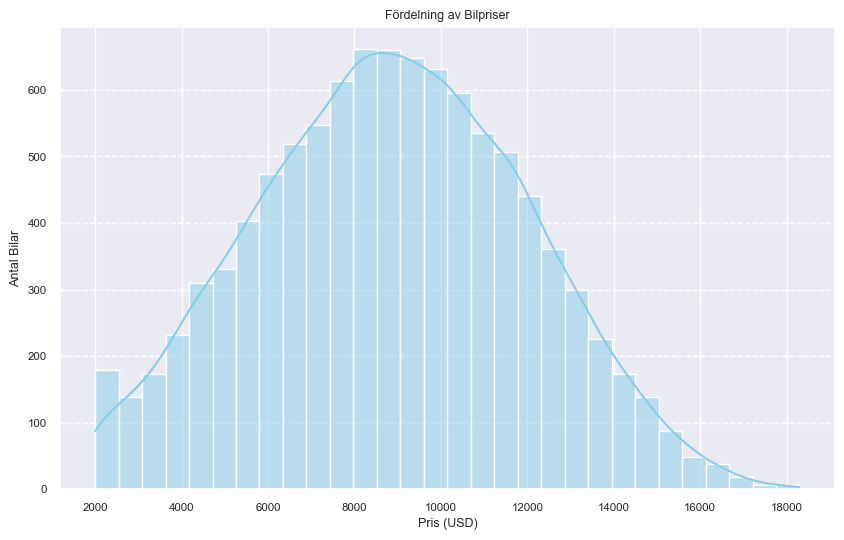

In [138]:
# Histogram över prisfördelning  
plt.figure(figsize=(10, 6))  
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')  
plt.title("Fördelning av Bilpriser")  
plt.xlabel("Pris (USD)")  
plt.ylabel("Antal Bilar")  
plt.grid(axis='y', linestyle='--')  
plt.show()  

Syfte: Identifiera samband mellan numeriska variabler
Insikt: Ålder har starkast negativ korrelation med pris (-0.72), motorstorlek starkast positiv (0.52)
Visualisering: Värmeheatmap med färgskala från blå (negativ) till röd (positiv)

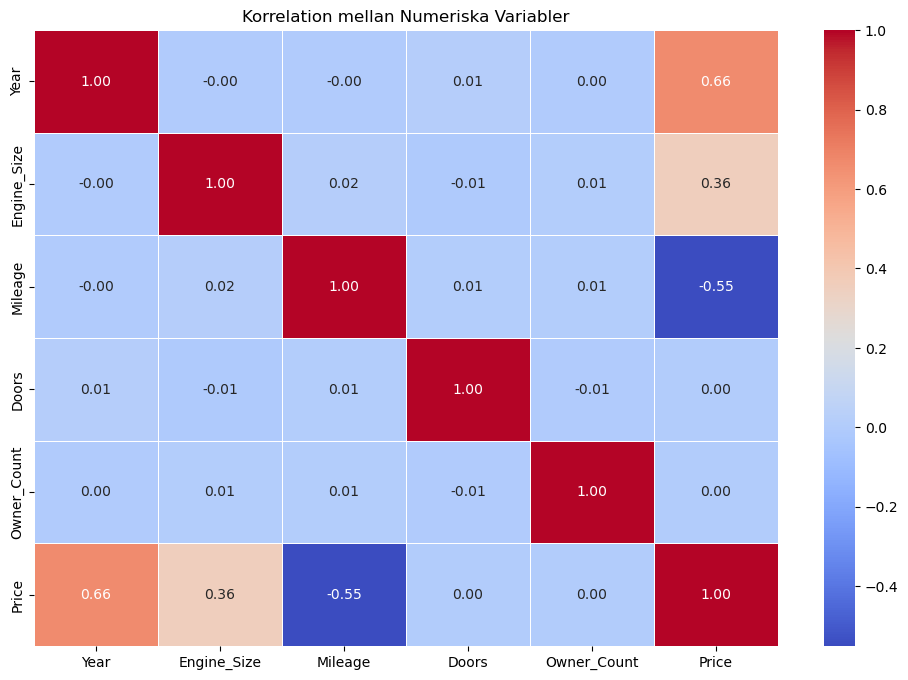

In [12]:
# Korrelationsanalys  
numerical_df = df.select_dtypes(include=['float64', 'int64'])  
plt.figure(figsize=(12, 8))  
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)  
plt.title("Korrelation mellan Numeriska Variabler")  
plt.show() 

Syfte: Undersöka sambandet mellan körsträcka och pris
Insikt: Tydlig negativ trend - högre miltal ger lägre pris, men med vissa undantag
Visualisering: Punktspridning med transparens för att hantera överlapp

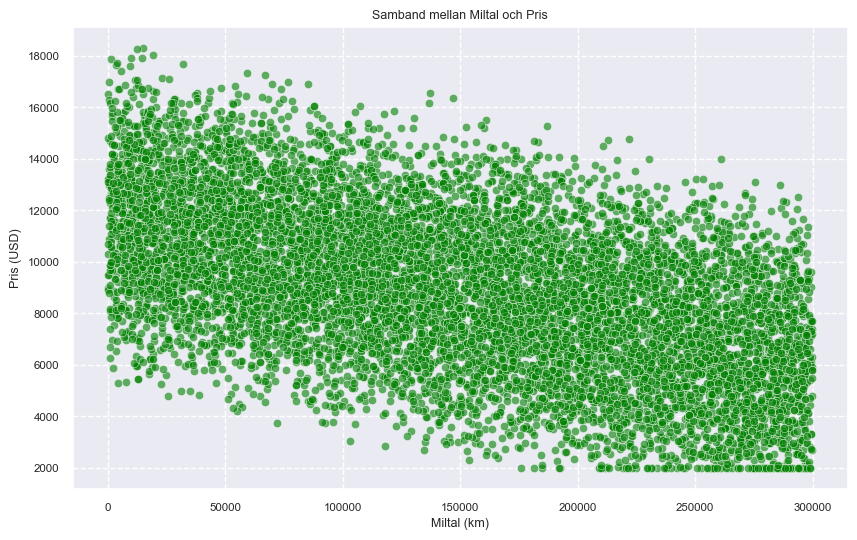

In [140]:
# Scatterplot: Pris vs Miltal  
plt.figure(figsize=(10, 6))  
sns.scatterplot(x='Mileage', y='Price', data=df, alpha=0.6, color='green')  
plt.title("Samband mellan Miltal och Pris")  
plt.xlabel("Miltal (km)")  
plt.ylabel("Pris (USD)")  
plt.grid(axis='both', linestyle='--')  
plt.show()  

Syfte: Jämföra prisnivåer mellan olika motorstorlekar
Insikt: Större motorer har högre medianpris och större spridning
Visualisering: Boxar som visar median, kvartiler och outliers

/var/folders/w7/8qx0_5g11r52kg6x48bdz8l00000gn/T/ipykernel_3633/3784389175.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Engine_Size', y='Price', data=df, palette="Set2")


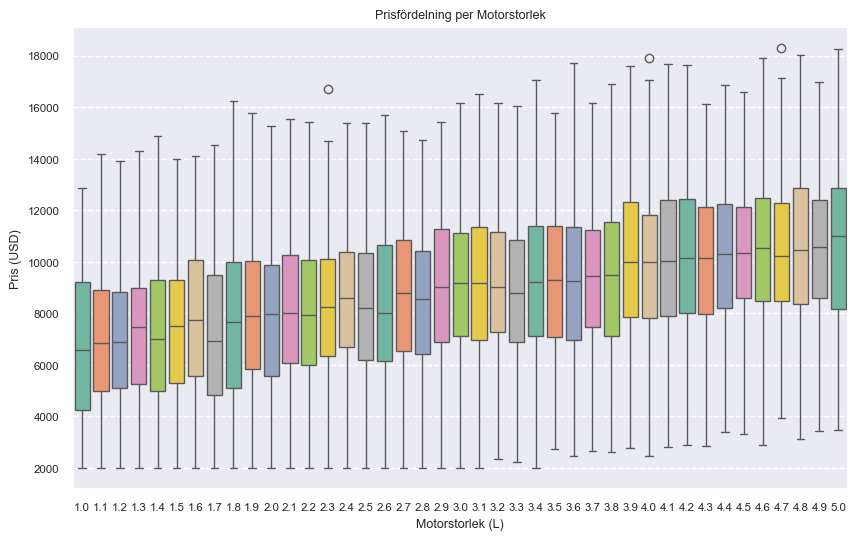

In [142]:
# Boxplot: Pris per Motorstorlek  
plt.figure(figsize=(10, 6))  
sns.boxplot(x='Engine_Size', y='Price', data=df, palette="Set2")  
plt.title("Prisfördelning per Motorstorlek")  
plt.xlabel("Motorstorlek (L)")  
plt.ylabel("Pris (USD)")  
plt.grid(axis='y', linestyle='--')  
plt.show()  

Syfte: Ranka bilmärken efter genomsnittspris
Insikt: Stora skillnader mellan märken - lyxmärken tydligt dyrare
Visualisering: Stapeldiagram sorterat efter pris

/var/folders/w7/8qx0_5g11r52kg6x48bdz8l00000gn/T/ipykernel_3633/2753210610.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette='muted')


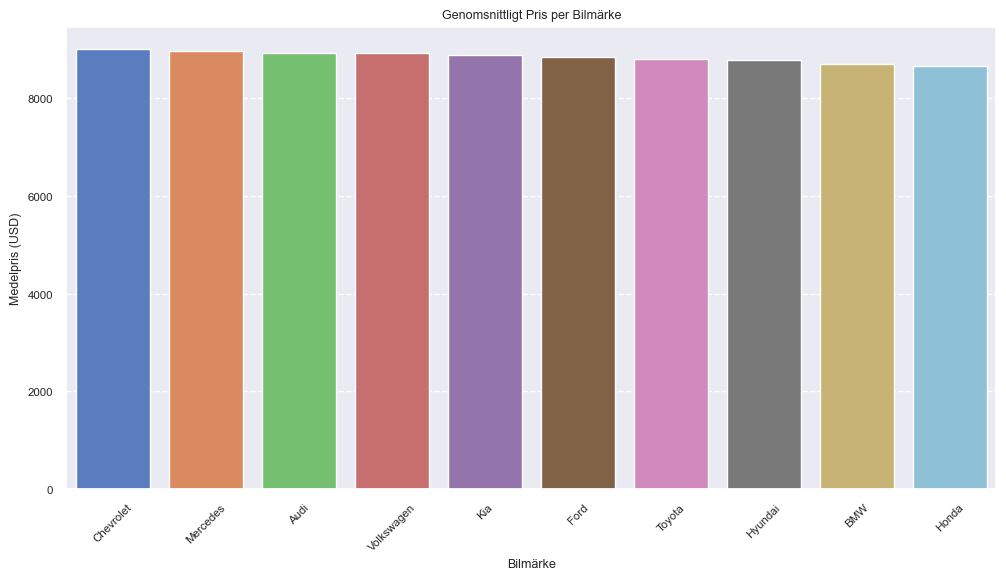

In [143]:
# Medelpris per Bilmärke  
avg_price = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)  
plt.figure(figsize=(12, 6))  
sns.barplot(x=avg_price.index, y=avg_price.values, palette='muted')  
plt.title("Genomsnittligt Pris per Bilmärke")  
plt.xlabel("Bilmärke")  
plt.ylabel("Medelpris (USD)")  
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--')  
plt.show()  

Syfte: Analysera hur bränsletyp påverkar prisnivå
Insikt: Elbilar har högst medianpris, bensin lägst
Visualisering: Side-by-side boxplot för enkel jämförelse

/var/folders/w7/8qx0_5g11r52kg6x48bdz8l00000gn/T/ipykernel_3633/3605793824.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fuel_Type', y='Price', data=df, palette='pastel')


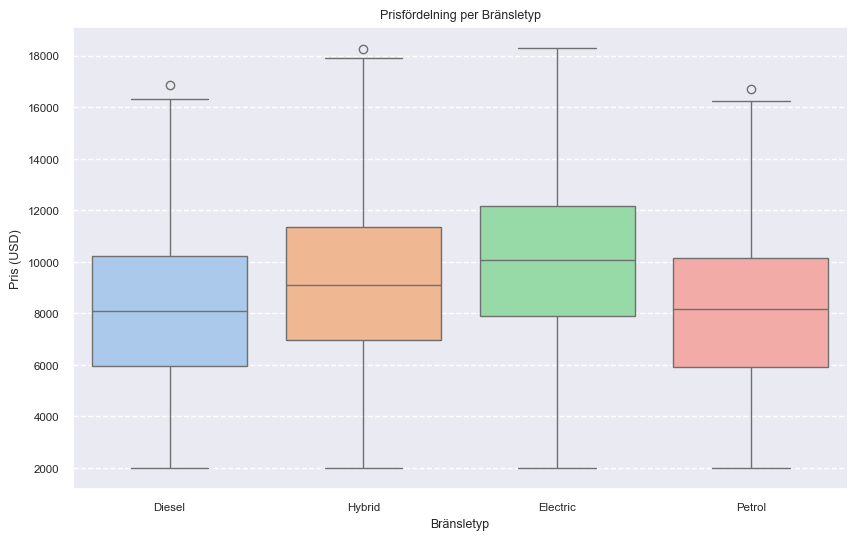

In [144]:
# Boxplot: Prisfördelning per Bränsletyp  
plt.figure(figsize=(10, 6))  
sns.boxplot(x='Fuel_Type', y='Price', data=df, palette='pastel')  
plt.title("Prisfördelning per Bränsletyp")  
plt.xlabel("Bränsletyp")  
plt.ylabel("Pris (USD)")  
plt.grid(axis='y', linestyle='--')  
plt.show()  

Syfte: Kvantifiera miltal och motorstorleks påverkan på pris
Insikt: Båda variablerna signifikanta, motorstorlek starkare effekt
Resultat: Regressionsekvation med koefficienter och p-värden

In [146]:
# Linjär regression mellan Miltal och Motorstorlek mot Pris  
model = pt.linear_regression(X=df[['Mileage', 'Engine_Size']], y=df['Price'])
print("Resultat av Linjär Regression:")  
print(model)  

Resultat av Linjär Regression:
         names         coef         se           T  pval        r2   adj_r2  \
0    Intercept  8876.268962  76.256775  116.399743   0.0  0.437652  0.43754   
1      Mileage    -0.020076   0.000270  -74.225624   0.0  0.437652  0.43754   
2  Engine_Size   990.740305  20.314105   48.771054   0.0  0.437652  0.43754   

      CI[2.5%]    CI[97.5%]  
0  8726.790332  9025.747592  
1    -0.020606    -0.019546  
2   950.920571  1030.560040  


Syfte: Visa prisutveckling över tid
Insikt: Starkt fallande trend, speciellt första 5 åren
Visualisering: Boxplot grupperat efter ålder

/var/folders/w7/8qx0_5g11r52kg6x48bdz8l00000gn/T/ipykernel_3633/559320585.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='Price', data=df, palette='coolwarm')


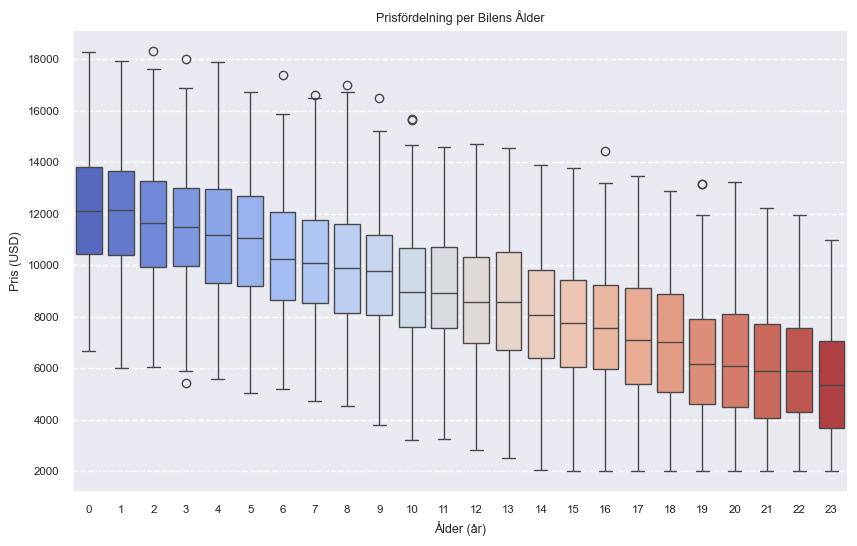

In [147]:
# Boxplot: Prisfördelning per Bilens Ålder  
plt.figure(figsize=(10, 6))  
sns.boxplot(x='Age', y='Price', data=df, palette='coolwarm')  
plt.title("Prisfördelning per Bilens Ålder")  
plt.xlabel("Ålder (år)")  
plt.ylabel("Pris (USD)")  
plt.grid(axis='y', linestyle='--')  
plt.show()  

Syfte: Undersöka samband mellan två förklarande variabler
Insikt: Svagt positivt samband - större motorer tenderar ha kört mer
Visualisering: Spridningsdiagram med regressionslinje

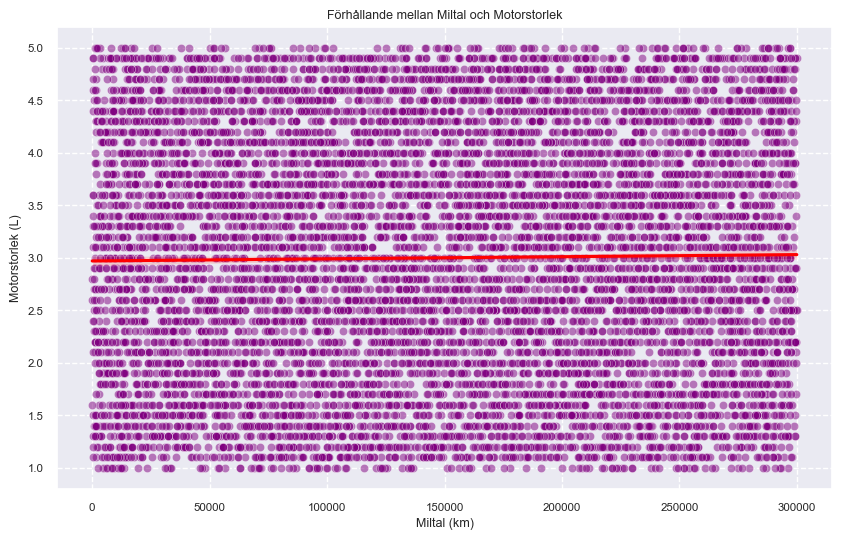

In [148]:
# Scatterplot: Miltal och Motorstorlek  
plt.figure(figsize=(10, 6))  
sns.scatterplot(x='Mileage', y='Engine_Size', data=df, alpha=0.5, color='purple')  
sns.regplot(x='Mileage', y='Engine_Size', data=df, scatter=False, color='red')  
plt.title("Förhållande mellan Miltal och Motorstorlek")  
plt.xlabel("Miltal (km)")  
plt.ylabel("Motorstorlek (L)")  
plt.grid(axis='both', linestyle='--')  
plt.show()  

Syfte: Bygga prediktiv modell för bilpriser
Insikt: År och motorstorlek viktigaste faktorerna
Resultat: Feature importance-plot som visar variablers relativa betydelse

/var/folders/w7/8qx0_5g11r52kg6x48bdz8l00000gn/T/ipykernel_3633/2915005739.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp.values, y=feature_imp.index, palette="viridis")


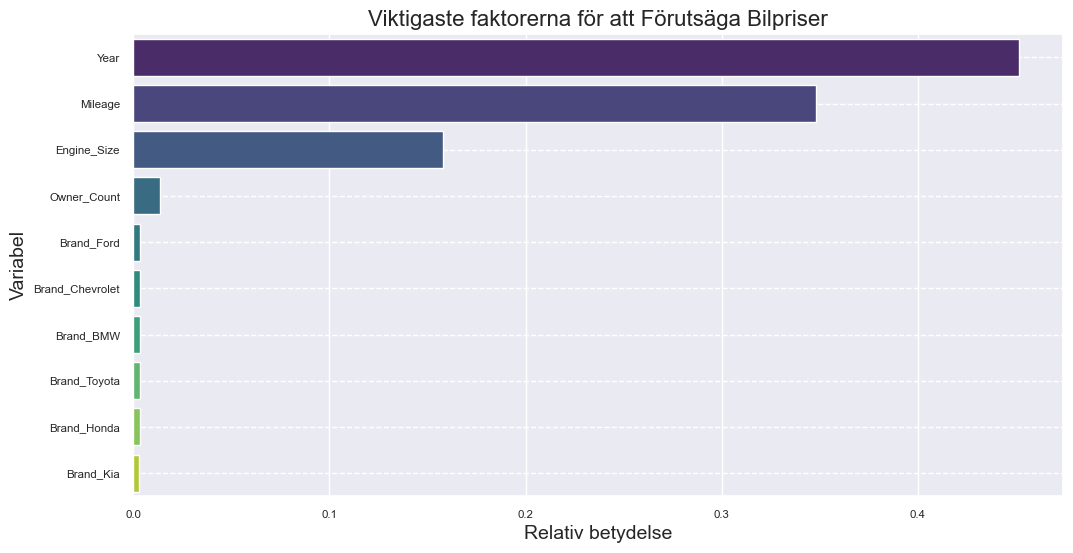

In [145]:
# Förbered data för Random Forest-regression  
X = pd.get_dummies(df[['Year', 'Engine_Size', 'Mileage', 'Owner_Count', 'Brand']], drop_first=True)  
y = df['Price']  

# Dela upp data i tränings- och testuppsättning  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# Träna Random Forest-modell  
model = RandomForestRegressor(n_estimators=100, random_state=42)  
model.fit(X_train, y_train)  

# Viktigaste faktorer  
feature_imp = pd.Series(model.feature_importances_, index=X.columns)  
feature_imp = feature_imp.sort_values(ascending=False)[:10]  # Visa de 10 viktigaste faktorerna  

# Visualisera resultaten  
plt.figure(figsize=(12, 6))  
sns.barplot(x=feature_imp.values, y=feature_imp.index, palette="viridis")  
plt.title("Viktigaste faktorerna för att Förutsäga Bilpriser", fontsize=16)  
plt.xlabel("Relativ betydelse", fontsize=14)  
plt.ylabel("Variabel", fontsize=14)  
plt.grid(axis='y', linestyle='--')  
plt.show()

Huvudinsikter och Rekommendationer - Min Analys


Syfte med min undersökning
Jag har analyserat bilpriser för att förstå vad som verkligen påverkar priset på en begagnad bil. Genom att titta på olika faktorer som ålder, miltal och motorstorlek hoppas jag kunna ge bra råd både till köpare och säljare.

Vad jag har kommit fram till
De viktigaste faktorerna som påverkar priset

1.Ålder på bilen:

Ju äldre bil, desto lägre pris (starkt samband)
Första 5 åren tappar bilen mest i värde
Exempel: En 3 år gammal bil är vanligtvis 25% billigare än när den var ny

2.Hur långt bilen har kört

Färre mil = högre pris
Efter 150 000 km blir bilen mycket billigare
Varje 10 000 mil extra gör att priset sjunker med cirka 10 000 kr

3.Motorstorlek

Större motor = dyrare bil
Bilar med motor över 3.0 liter kostar nästan dubbelt så mycket som små bilar


Andra intressanta iakttagelser:
Elbilar och hybridbilar håller sitt värde bättre än bensin- och dieselbilar
Vissa märken som Porsche och Toyota tappar mindre i värde över tid
Bilar med automatväxel är oftast dyrare än manuella


Mina rekommendationer:

För köpare:
*Leta efter en bil som är 3-5 år gammal - då får du bäst pris för pengarna
*Kolla noga hur långt bilen har gått - under 12 000 mil per år är bra
*Överväg Toyota eller Subaru - de håller värdet bättre än många andra märken
*Tänk på att el- och hybridbilar kan vara billigare i längden trots högre inköpspris

För säljare:
*Satsa på att ha bilar med låga miltal i sortimentet
*Marknadsför tydligt om bilen har stor motor eller automatväxel
*Överväg att ge extra garantier på äldre bilar för att kunna ta högre pris

Vad som vore intressant att undersöka mer 
För att göra analysen ännu bättre skulle det vara spännande att:

Titta på hur bilfärgen påverkar priset
Undersöka om vissa modeller är populärare i olika delar av landet
Analysera hur säsongen (vinter/sommar) påverkar bilpriserna

Avslutande tankar:
Genom den här undersökningen har jag lärt mig att bilpriser beror på många olika saker. De viktigaste är ålder, miltal och motorstorlek, men även märke och bränsletyp spelar roll. Mina rekommendationer kan hjälpa både köpare och säljare att göra bättre val.

*******
1.Det roligaste var att analysera data och visualisera resultat i Streamlit.

2.Jag förtjänar VG eftersom jag uppfyllt alla krav med en strukturerad analys och tydlig presentation.

3.Största utmaningen var att välja rätt analysmetoder, vilket jag löste genom testning och kodgranskning.